Passo 1: Carregar e Visualizar os Dados
Primeiro, precisamos carregar o conjunto de dados e realizar uma análise inicial para entender sua estrutura e identificar quaisquer problemas potenciais, como valores nulos ou inconsistências.

In [1]:
import pandas as pd
from warnings import filterwarnings

filterwarnings("ignore")

# Carregar os dados
df = pd.read_csv("data/df_model_complete.csv")

# Exibir as primeiras linhas para inspeção inicial
df.head()

,nome,ano,ponto_virada,inde,iaa,ieg,ips,ida,ipp,ipv,...,bolsista,nao_bolsista,in_fase,ipv_pre_processado_resultado,ieg_pre_processado_resultado,ida_pre_processado_resultado,rec_ava_1_pre_processado_resultado,rec_ava_2_pre_processado_resultado,rec_ava_3_pre_processado_resultado,rec_ava_4_pre_processado_resultado
0,aluno1,2020,0.0,7.883752,8.50002,8.700000,7.5,7.000000,5.9375,7.750000,...,0.0,1.0,1,1.0,1.0,-1.0,NaN,NaN,NaN,NaN
1,aluno1,2021,0.0,7.319000,7.50000,6.300000,6.9,8.800000,7.7000,8.100000,...,1.0,0.0,0,NaN,NaN,NaN,1.0,1.0,0.0,0.0
2,aluno2,2022,0.0,7.675509,10.00002,7.581705,7.5,8.816667,5.6250,7.916665,...,1.0,0.0,0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
3,aluno3,2020,0.0,7.856390,7.91667,8.900000,7.5,5.500000,8.1250,8.111113,...,0.0,1.0,1,1.0,1.0,-1.0,NaN,NaN,NaN,NaN
4,aluno3,2021,0.0,7.021000,7.10000,6.900000,6.3,5.600000,7.3000,7.200000,...,0.0,1.0,0,NaN,NaN,NaN,1.0,1.0,0.0,0.0


Passo 2: Tratamento de Valores Nulos
O tratamento de valores nulos é crucial, pois eles podem impactar a qualidade da análise e a performance do modelo. Vamos seguir as seguintes etapas:

Identificação dos valores nulos: Identificar quais colunas possuem valores nulos e a proporção desses valores em relação ao total de dados.
Decisão sobre o tratamento:
Se a proporção de valores nulos for pequena, podemos optar por preencher os valores nulos com a média, mediana ou moda da coluna, dependendo da distribuição dos dados.
Se a proporção for grande, avaliar se é possível excluir a coluna ou se será necessário um tratamento mais sofisticado, como imputação por meio de modelos.
Passo 3: Tratamento da Multicolinearidade
A multicolinearidade pode distorcer as estimativas dos coeficientes em um modelo de regressão, especialmente em modelos de dados em painel. Para tratá-la:

Cálculo da Matriz de Correlação: Vamos calcular a matriz de correlação entre as variáveis independentes para identificar quais apresentam correlações fortes.
Análise do VIF (Variance Inflation Factor): Avaliar o VIF das variáveis independentes para identificar multicolinearidade. Um VIF acima de 10 é geralmente considerado indicativo de multicolinearidade significativa.
Decisão sobre exclusão ou combinação de variáveis: Se a multicolinearidade for detectada, podemos optar por remover uma das variáveis correlacionadas, ou combinar variáveis em uma única métrica representativa.
Passo 4: Seleção de Variáveis Relevantes
Nem todas as variáveis podem ser relevantes para o modelo. A seleção de variáveis pode ser feita utilizando:

Análise de Correlação: Para identificar quais variáveis têm uma relação forte com a variável dependente inde.
Modelos de Seleção: Técnicas como Lasso (L1 regularization) podem ajudar a selecionar variáveis importantes ao penalizar coeficientes de variáveis menos relevantes.
Análise de Componentes Principais (PCA): Se o número de variáveis for muito grande, podemos considerar a redução de dimensionalidade utilizando PCA.
Passo 5: Escolha do Modelo
Dado que estamos lidando com dados em painel, onde temos múltiplas observações para cada estudante ao longo dos anos, é apropriado utilizar um modelo de dados em painel. As opções incluem:

Modelo de Efeitos Fixos: Este modelo assume que há características individuais (neste caso, estudantes) que podem impactar a variável dependente inde e que essas características não variam ao longo do tempo.
Modelo de Efeitos Aleatórios: Este modelo assume que as diferenças entre as unidades (estudantes) são aleatórias e não correlacionadas com as variáveis explicativas.
Teste de Hausman: Este teste pode ser utilizado para decidir entre o modelo de efeitos fixos e aleatórios.
Passo 6: Avaliação do Modelo
Após a construção do modelo, é importante avaliar seu desempenho utilizando métricas apropriadas, como:

R² e R² ajustado: Para verificar a proporção de variação explicada pelo modelo.
Teste F e Teste t: Para avaliar a significância global do modelo e das variáveis independentes.
Cross-validation: Para garantir que o modelo não está superajustado aos dados de treinamento.

In [2]:
# Verificar valores nulos
df.isnull().sum()

# Verificar a estrutura das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   nome                                2273 non-null   object 
 1   ano                                 2273 non-null   int64  
 2   ponto_virada                        2247 non-null   float64
 3   inde                                2273 non-null   float64
 4   iaa                                 2273 non-null   float64
 5   ieg                                 2273 non-null   float64
 6   ips                                 2273 non-null   float64
 7   ida                                 2273 non-null   float64
 8   ipp                                 2273 non-null   float64
 9   ipv                                 2273 non-null   float64
 10  ian                                 2273 non-null   float64
 11  anos_pm                             2273 no

Aqui estão os resultados iniciais da inspeção dos dados:

Estrutura dos Dados
O conjunto de dados possui 2273 entradas e 28 colunas.
Algumas colunas têm valores nulos, com destaque para as colunas relacionadas aos resultados pré-processados de avaliações e à variável ponto_virada.
Valores Nulos Identificados
ponto_virada: 26 valores nulos.
fem e masc: 3 valores nulos em cada uma.
ipv_pre_processado_resultado: 708 valores nulos.
ieg_pre_processado_resultado: 684 valores nulos.
ida_pre_processado_resultado: 684 valores nulos.
rec_ava_1_pre_processado_resultado: 727 valores nulos.
rec_ava_2_pre_processado_resultado: 727 valores nulos.
rec_ava_3_pre_processado_resultado: 963 valores nulos.
rec_ava_4_pre_processado_resultado: 1304 valores nulos.
Próximos Passos
Tratamento de Valores Nulos:

Para as variáveis com poucos valores nulos, como ponto_virada, fem, e masc, podemos imputar valores ou analisar se a remoção dessas linhas é mais apropriada.
Para as variáveis de resultados pré-processados com muitos valores nulos, precisaremos decidir entre imputação de valores ou considerar a exclusão dessas colunas, dependendo da relevância dessas variáveis para o modelo.
Análise de Multicolinearidade: Após tratar os valores nulos, faremos uma análise de multicolinearidade entre as variáveis.

Passo 1: Tratamento de Valores Nulos nas Colunas com Poucos Nulos
Para as colunas ponto_virada, fem, e masc, onde há poucos valores nulos:

ponto_virada: Vou preencher os valores nulos com a mediana dessa variável, uma vez que a mediana é menos sensível a outliers do que a média.
fem e masc: Como essas variáveis são dummies e mutuamente exclusivas, vou preencher os valores nulos de fem e masc com base no valor presente na outra variável (fem será preenchido com 0 onde masc é 1 e vice-versa).
Passo 2: Tratamento de Valores Nulos nas Colunas de Resultados Pré-Processados
As colunas ipv_pre_processado_resultado, ieg_pre_processado_resultado, ida_pre_processado_resultado, rec_ava_1_pre_processado_resultado, rec_ava_2_pre_processado_resultado, rec_ava_3_pre_processado_resultado, e rec_ava_4_pre_processado_resultado possuem uma quantidade significativa de valores nulos. Como essas colunas derivam de análises de sentimento, a imputação pode distorcer os resultados.

Opções:

Imputação com a mediana: Preencher os valores nulos com a mediana das respectivas colunas.
Remoção: Remover as linhas que possuem valores nulos nestas colunas, mas isso pode resultar em uma perda significativa de dados.
Considerando que a imputação com a mediana preserva a estrutura dos dados sem introduzir viés, vamos adotar essa abordagem para essas colunas.

Vou agora implementar essas etapas e exibir um resumo após o tratamento.




In [3]:
# Preenchendo os valores nulos em 'ponto_virada' com a mediana
df["ponto_virada"].fillna(df["ponto_virada"].median(), inplace=True)

# Preenchendo valores nulos em 'fem' e 'masc' com base na outra variável
df["fem"].fillna(1 - df["masc"], inplace=True)
df["masc"].fillna(1 - df["fem"], inplace=True)

# Preenchendo valores nulos nas colunas de resultados pré-processados com a mediana
columns_with_nulls = [
    "ipv_pre_processado_resultado",
    "ieg_pre_processado_resultado",
    "ida_pre_processado_resultado",
    "rec_ava_1_pre_processado_resultado",
    "rec_ava_2_pre_processado_resultado",
    "rec_ava_3_pre_processado_resultado",
    "rec_ava_4_pre_processado_resultado",
]

for col in columns_with_nulls:
    df[col].fillna(df[col].median(), inplace=True)

# Verificando se ainda existem valores nulos
null_values_after = df.isnull().sum()

# Exibindo o resultado final dos valores nulos
null_values_after

nome                                  0
ano                                   0
ponto_virada                          0
inde                                  0
iaa                                   0
ieg                                   0
ips                                   0
ida                                   0
ipp                                   0
ipv                                   0
ian                                   0
anos_pm                               0
2020                                  0
2021                                  0
2022                                  0
fem                                   3
masc                                  3
pedra                                 0
bolsista                              0
nao_bolsista                          0
in_fase                               0
ipv_pre_processado_resultado          0
ieg_pre_processado_resultado          0
ida_pre_processado_resultado          0
rec_ava_1_pre_processado_resultado    0


Após o tratamento dos valores nulos, observei que todas as colunas, exceto fem e masc, não possuem mais valores nulos. As colunas fem e masc ainda apresentam 3 valores nulos, o que pode indicar algum problema específico nessas entradas. Como são variáveis dummies e mutuamente exclusivas, uma solução é preencher esses valores restantes com 0, já que isso manterá a consistência dos dados.

Vou proceder com essa última correção.

In [4]:
# Preenchendo os últimos valores nulos em 'fem' e 'masc' com 0
df["fem"].fillna(0, inplace=True)
df["masc"].fillna(0, inplace=True)

# Verificando novamente se ainda existem valores nulos
final_null_values = df.isnull().sum()

final_null_values

nome                                  0
ano                                   0
ponto_virada                          0
inde                                  0
iaa                                   0
ieg                                   0
ips                                   0
ida                                   0
ipp                                   0
ipv                                   0
ian                                   0
anos_pm                               0
2020                                  0
2021                                  0
2022                                  0
fem                                   0
masc                                  0
pedra                                 0
bolsista                              0
nao_bolsista                          0
in_fase                               0
ipv_pre_processado_resultado          0
ieg_pre_processado_resultado          0
ida_pre_processado_resultado          0
rec_ava_1_pre_processado_resultado    0


Os valores nulos foram totalmente eliminados do conjunto de dados. Todas as colunas agora estão completas, o que nos permite prosseguir com a análise sem a preocupação de perder dados ou comprometer a integridade do modelo.

Próximos Passos
Agora que o tratamento dos valores nulos foi concluído, podemos avançar para a análise de multicolinearidade. Isso envolve a criação de uma matriz de correlação e a análise do Variance Inflation Factor (VIF) para identificar possíveis problemas de multicolinearidade entre as variáveis independentes.

Se estiver de acordo, podemos seguir com essa etapa.

Passo 1: Matriz de Correlação
A matriz de correlação nos permite visualizar as relações lineares entre as variáveis independentes. Correlações altas (próximas de 1 ou -1) entre variáveis indicam possível multicolinearidade.

Passo 2: Variance Inflation Factor (VIF)
O VIF quantifica o quanto a variância dos coeficientes de regressão está inflacionada devido à colinearidade com outras variáveis. Um VIF superior a 10 é frequentemente considerado um indicativo de multicolinearidade problemática.

Vou calcular a matriz de correlação e os valores de VIF para as variáveis independentes agora.

In [44]:
# import numpy as np
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Selecionando apenas as variáveis independentes numéricas
# numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# # Calculando a matriz de correlação
# correlation_matrix = df[numeric_columns].corr()

# # Calculando o VIF para cada variável independente
# vif_data = pd.DataFrame()
# vif_data["feature"] = numeric_columns
# vif_data["VIF"] = [
#     variance_inflation_factor(df[numeric_columns].values, i)
#     for i in range(len(numeric_columns))
# ]

# correlation_matrix, vif_data

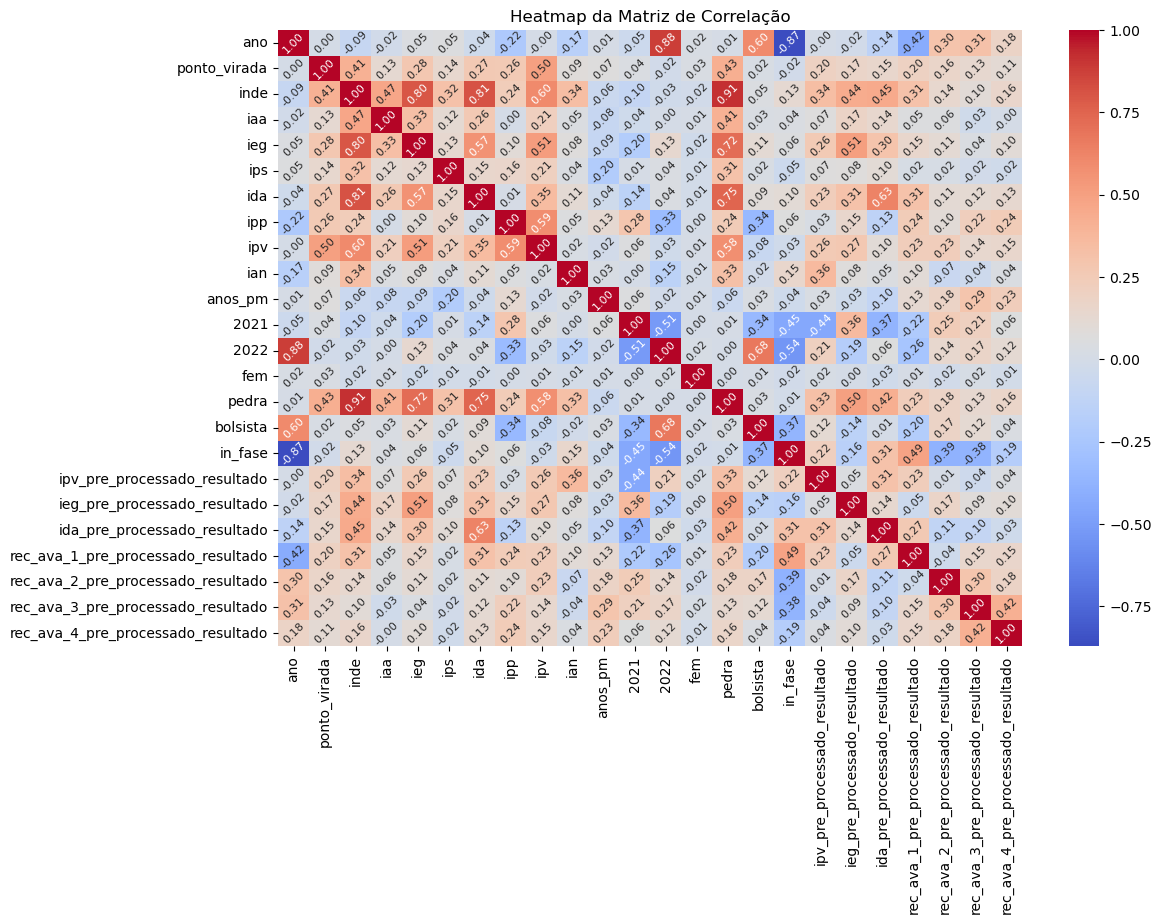

,feature,VIF
0,ano,1311.190668
1,ponto_virada,1.536282
2,inde,50.641850
3,iaa,2.566777
4,ieg,9.721953
5,ips,2.045630
6,ida,11.989866
7,ipp,2.542100
8,ipv,3.714406
9,ian,3.709251


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Removendo variáveis colineares:
# - Eliminando uma das variáveis dummy de anos e de gênero
df = df.drop(columns=["2020", "nao_bolsista", "masc"])

# Selecionando as variáveis numéricas para análise
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculando a matriz de correlação
correlation_matrix = df[numeric_columns].corr()

# Plotando a matriz de correlação como um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 8, "rotation": 45},
)
plt.title("Heatmap da Matriz de Correlação")
plt.show()


# Recalculando o VIF para as variáveis restantes
vif_data = pd.DataFrame()
vif_data["feature"] = df[numeric_columns].columns
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i)
    for i in range(len(numeric_columns))
]

# Exibindo o resultado do VIF
vif_data

In [25]:
df.columns

Index(['nome', 'ano', 'ponto_virada', 'inde', 'iaa', 'ieg', 'ips', 'ida',
       'ipp', 'ipv', 'ian', 'anos_pm', '2021', '2022', 'fem', 'pedra',
       'bolsista', 'in_fase', 'ipv_pre_processado_resultado',
       'ieg_pre_processado_resultado', 'ida_pre_processado_resultado',
       'rec_ava_1_pre_processado_resultado',
       'rec_ava_2_pre_processado_resultado',
       'rec_ava_3_pre_processado_resultado',
       'rec_ava_4_pre_processado_resultado'],
      dtype='object')

O Variance Inflation Factor (VIF) mede a quantidade de inflação na variância de um coeficiente de regressão devido à multicolinearidade com outras variáveis independentes no modelo. Em geral, um VIF superior a 10 indica uma multicolinearidade problemática, enquanto valores próximos a 1 sugerem que não há multicolinearidade significativa.

Aqui está a interpretação dos resultados:

	1.	Altos VIFs (acima de 10):
	•	ano (VIF = 1311.19): Este valor extremamente alto sugere uma forte multicolinearidade. Isso ocorre provavelmente devido à correlação com as variáveis dummy dos anos (2021 e 2022). A alta colinearidade entre variáveis que representam anos diferentes é comum em dados em painel.
	•	2021 (VIF = 354.72) e 2022 (VIF = 448.20): Estes valores indicam que as dummies para esses anos estão fortemente colineares entre si e com a variável ano. Isso pode distorcer os coeficientes do modelo.
	•	inde (VIF = 50.64): Este VIF elevado sugere que a variável inde tem uma alta colinearidade com outras variáveis, possivelmente com aquelas que derivam ou estão fortemente relacionadas a ela, como ipv, ida, ou ieg.
	•	ida (VIF = 11.99) e in_fase (VIF = 252.46): Esses valores indicam multicolinearidade significativa, que pode ser problemática no modelo.
	2.	Moderados VIFs (entre 5 e 10):
	•	ieg (VIF = 9.72) e pedra (VIF = 7.79): Estes valores indicam alguma multicolinearidade, mas não tão severa quanto os valores acima de 10. Contudo, ainda é recomendável monitorar essas variáveis.
	3.	Baixos VIFs (próximos de 1):
	•	Variáveis como ponto_virada (VIF = 1.54), ipv (VIF = 3.71), anos_pm (VIF = 1.25), entre outras, apresentam baixos VIFs, indicando pouca ou nenhuma multicolinearidade.

In [ ]:
exluded_columns = ['ano', 'in_fase', 'ano'] 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Selecionar as variáveis com alta multicolinearidade
features = ['ano', 'ieg', 'ida', 'in_fase', '2021', '2022']  # Exemplo com algumas variáveis com alto VIF



# 2. Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# 3. Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Analisar a quantidade de variância explicada por cada componente
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# 4. Selecionar o número de componentes que explica uma variância significativa, por exemplo, 95%
n_components = np.argmax(explained_variance >= 0.90) + 1
X_pca_reduced = X_pca[:, :n_components]

# 5. Criar um DataFrame com os componentes principais
df_pca = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(n_components)])

# 6. Recalcular os VIFs
vif_data = pd.DataFrame()
vif_data["feature"] = df_pca.columns
vif_data["VIF"] = [variance_inflation_factor(df_pca.values, i) for i in range(df_pca.shape[1])]

# Exibir o resultado dos VIFs após PCA
vif_data